**EXPLORATORY DATA ANALYSIS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




Importing the two csv datasets and merging them into one

In [ ]:
table_chemicals = pd.read_csv("chemicals-in-cosmetics-.csv")  #Chemicals dataset from Kaggle
table_cosmetics = pd.read_csv("cosmetics.csv")  # We use this dataset to get the skin type information we need for each Brand
merged_table = pd.merge(table_chemicals, table_cosmetics, left_on='BrandName', right_on='Brand') #BrandName and Brand are the key columns we can use to do innerjoin
merged_table.head(20)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,5391,NARS Blush Duo,9763.0,Hungry Heart,127,"Shiseido America, Inc.",NARS,44,Makeup Products (non-permanent),45,...,NARS,Gentle Oil-Free Eye Makeup Remover,25,4.3,"Water, Methyl Trimethicone, Isopropyl Isostear...",0,0,0,0,0
1,5391,NARS Blush Duo,9763.0,Hungry Heart,127,"Shiseido America, Inc.",NARS,44,Makeup Products (non-permanent),45,...,NARS,Total Replenishing Eye Cream,58,3.3,Visit the NARS boutique,0,0,0,0,0
2,5391,NARS Blush Duo,9763.0,Hungry Heart,127,"Shiseido America, Inc.",NARS,44,Makeup Products (non-permanent),45,...,NARS,Pure Radiant Tinted Moisturizer Broad Spectrum...,45,4.4,Visit the NARS boutique,0,0,0,0,0
3,5391,NARS Blush Duo,9763.0,Hungry Heart,127,"Shiseido America, Inc.",NARS,44,Makeup Products (non-permanent),45,...,NARS,Radiance Primer Broad Spectrum SPF 35 Sunscreen,36,4.1,"Water, Caprylyl Methicone, Dipropylene Glycol,...",0,0,0,0,0
4,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,GUERLAIN,Midnight Secret Late Night Recovery Treatment,29,4.2,Visit the Guerlain boutique,1,1,1,1,1
5,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,GUERLAIN,Abeille Royale Youth Watery Oil,50,4.1,-Black Bee Honey -Ouessant Honey: Repairs skin...,1,1,1,1,0
6,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,GUERLAIN,Lingerie de Peau BB Cream,54,4.3,-Titanium Dioxide 3.55%: Sunscreen. -Octinoxat...,1,1,1,1,1
7,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,GUERLAIN,Abeille Royale Daily Repair Serum,150,3.6,#NAME?,0,0,0,0,0
8,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,GUERLAIN,Orchidee Imperiale The Eye and Lip Contour Cream,200,3.0,Visit the Guerlain boutique,1,1,1,1,1
9,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,GUERLAIN,Orchidée Impériale Eye Serum,230,5.0,Visit the Guerlain boutique,0,0,0,0,0


We analyzed the toxins most used in the merged dataset and for each toxic chemical we will have a **TOXIN_ISSUE** column which we will create and map the column based on the **ChemicalName** column already present

We will first get the list of the chemical toxins and their respective properties:

In [ ]:
chemical_properties = {
    "Aloe vera, whole leaf extract": "Benefits: Soothes skin, reduces inflammation, hydrates. Risks: Can cause stomach issues and may be carcinogenic if taken in large amounts. Safe Use: Avoid high oral doses; aloin should be less than 10 ppm.",
    "Benzophenone-3": "Benefits: UV protection in sunscreens. Risks: May cause allergies and hormonal imbalance. Safe Use: Keep below 6% concentration in products.",
    "Benzophenone-4": "Benefits: UV protection for skin and hair. Risks: May cause skin irritation. Safe Use: Use below 10% concentration.",
    "Butylated hydroxyanisole": "Benefits: Prevents spoilage in food and cosmetics. Risks: Linked to cancer and hormone issues. Safe Use: Less than 0.5% in products.",
    "Caffeine": "Benefits: Reduces puffiness, improves circulation. Risks: Can irritate skin; high oral doses can cause anxiety. Safe Use: Topical use is safe; keep oral intake under 400 mg/day.",
    "Carbon black": "Benefits: Provides deep black color in cosmetics. Risks: Inhalation can cause respiratory issues and cancer risk. Safe Use: Safe in non-airborne forms.",
    "Carbon black (airborne, unbound particles of respirable size)": "Benefits: None for cosmetics. Risks: Causes lung damage and cancer when inhaled. Safe Use: Avoid inhalation; use in controlled environments.",
    "Cocamide MEA": "Benefits: Improves foam and texture in shampoos. Risks: Skin/eye irritation; may form carcinogenic by-products. Safe Use: Avoid with nitrosating agents; use below 10%.",
    "Mica": "Benefits: Adds shimmer and shine to cosmetics. Risks: Inhalation of powder form can cause lung issues. Safe Use: Safe in creams; avoid inhaling mica dust.",
    "Retinyl palmitate": "Benefits: Anti-aging, improves skin renewal. Risks: Increases skin sensitivity and sunburn risk. Safe Use: Use less than 1% topically; avoid high oral doses.",
    "Titanium dioxide": "Benefits: UV Protection, gentle on skin, and great for makeup. Risks: avoid inhalation of powdered forms. Safe Use: Safe when applied topically."
}

chemical_properties

{'Aloe vera, whole leaf extract': 'Benefits: Soothes skin, reduces inflammation, hydrates. Risks: Can cause stomach issues and may be carcinogenic if taken in large amounts. Safe Use: Avoid high oral doses; aloin should be less than 10 ppm.',
 'Benzophenone-3': 'Benefits: UV protection in sunscreens. Risks: May cause allergies and hormonal imbalance. Safe Use: Keep below 6% concentration in products.',
 'Benzophenone-4': 'Benefits: UV protection for skin and hair. Risks: May cause skin irritation. Safe Use: Use below 10% concentration.',
 'Butylated hydroxyanisole': 'Benefits: Prevents spoilage in food and cosmetics. Risks: Linked to cancer and hormone issues. Safe Use: Less than 0.5% in products.',
 'Caffeine': 'Benefits: Reduces puffiness, improves circulation. Risks: Can irritate skin; high oral doses can cause anxiety. Safe Use: Topical use is safe; keep oral intake under 400 mg/day.',
 'Carbon black': 'Benefits: Provides deep black color in cosmetics. Risks: Inhalation can cause r

We will now add this column into the merged dataset based on the ChemicalName column

In [ ]:
def get_chemical_properties(chemical_name):
    return chemical_properties.get(chemical_name, "NA")  #We will give no specific properties for products without chemicalname
merged_table['Chemical_Properties'] = merged_table['ChemicalName'].apply(get_chemical_properties)
merged_table.head(20)



,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,Chemical_Properties
0,5391,NARS Blush Duo,9763.0,Hungry Heart,127,"Shiseido America, Inc.",NARS,44,Makeup Products (non-permanent),45,...,Gentle Oil-Free Eye Makeup Remover,25,4.3,"Water, Methyl Trimethicone, Isopropyl Isostear...",0,0,0,0,0,Benefits: Prevents spoilage in food and cosmet...
1,5391,NARS Blush Duo,9763.0,Hungry Heart,127,"Shiseido America, Inc.",NARS,44,Makeup Products (non-permanent),45,...,Total Replenishing Eye Cream,58,3.3,Visit the NARS boutique,0,0,0,0,0,Benefits: Prevents spoilage in food and cosmet...
2,5391,NARS Blush Duo,9763.0,Hungry Heart,127,"Shiseido America, Inc.",NARS,44,Makeup Products (non-permanent),45,...,Pure Radiant Tinted Moisturizer Broad Spectrum...,45,4.4,Visit the NARS boutique,0,0,0,0,0,Benefits: Prevents spoilage in food and cosmet...
3,5391,NARS Blush Duo,9763.0,Hungry Heart,127,"Shiseido America, Inc.",NARS,44,Makeup Products (non-permanent),45,...,Radiance Primer Broad Spectrum SPF 35 Sunscreen,36,4.1,"Water, Caprylyl Methicone, Dipropylene Glycol,...",0,0,0,0,0,Benefits: Prevents spoilage in food and cosmet...
4,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,Midnight Secret Late Night Recovery Treatment,29,4.2,Visit the Guerlain boutique,1,1,1,1,1,"Benefits: UV Protection, gentle on skin, and g..."
5,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,Abeille Royale Youth Watery Oil,50,4.1,-Black Bee Honey -Ouessant Honey: Repairs skin...,1,1,1,1,0,"Benefits: UV Protection, gentle on skin, and g..."
6,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,Lingerie de Peau BB Cream,54,4.3,-Titanium Dioxide 3.55%: Sunscreen. -Octinoxat...,1,1,1,1,1,"Benefits: UV Protection, gentle on skin, and g..."
7,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,Abeille Royale Daily Repair Serum,150,3.6,#NAME?,0,0,0,0,0,"Benefits: UV Protection, gentle on skin, and g..."
8,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,Orchidee Imperiale The Eye and Lip Contour Cream,200,3.0,Visit the Guerlain boutique,1,1,1,1,1,"Benefits: UV Protection, gentle on skin, and g..."
9,5742,SUCCESS AGE SPLENDID - DEEP-ACTION NIGHT CARE ...,NaN,NaN,298,GUERLAIN,GUERLAIN,90,Skin Care Products,97,...,Orchidée Impériale Eye Serum,230,5.0,Visit the Guerlain boutique,0,0,0,0,0,"Benefits: UV Protection, gentle on skin, and g..."


Now let us perfom some tasks done before we proceed with the EDA

Let us calculate the number of duplicates

In [ ]:
original_rows = len(merged_table)
merged_table = merged_table.drop_duplicates()
new_rows = len(merged_table)
print(f"{original_rows - new_rows} ")  # we get 0 so no duplicate entries. This is mostly because each product has a different usecase - soap, facewash, conditioner, etc

0 


Set precision

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) #setting precision to .2f
summary_stats = merged_table.describe()
# summary_stats

We will calculate the Variance, Inter-Quartile Range and Standard Deviation of the Price column as it can be used as the standard column to compare the data prices

In [ ]:
price_variance = np.var(merged_table['Price'],ddof=1) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html --> ddof is 0 by default we have to take 1
                                                      #https://stackoverflow.com/questions/31886826/numpy-1-degree-of-freedom
print("variance of price is: ",price_variance)

price_standard_deviation = np.std(merged_table['Price'],ddof=1)  #https://numpy.org/doc/stable/reference/generated/numpy.std.html --> ddof is 0 by default we have taken 1
print("standard deviation of price: ", price_standard_deviation)

#According to https://stackoverflow.com/questions/23228244/how-do-you-find-the-iqr-in-numpy there is no method in numpy to directly call for quartile range
iqr = np.subtract(*np.percentile(merged_table['Price'], [75, 25]))
print("Inter-Quartile Range is: ", iqr)



variance of price is:  3591.083145454786
standard deviation of price:  59.925646808814555
Inter-Quartile Range is:  38.0


Now let us begin with our EDA Hypothesis

# Hypothesis 1 \: Higher the Price, Higher the Rank  ANIRUDH NADIG (50613184)

Text(0, 0.5, 'Rank')

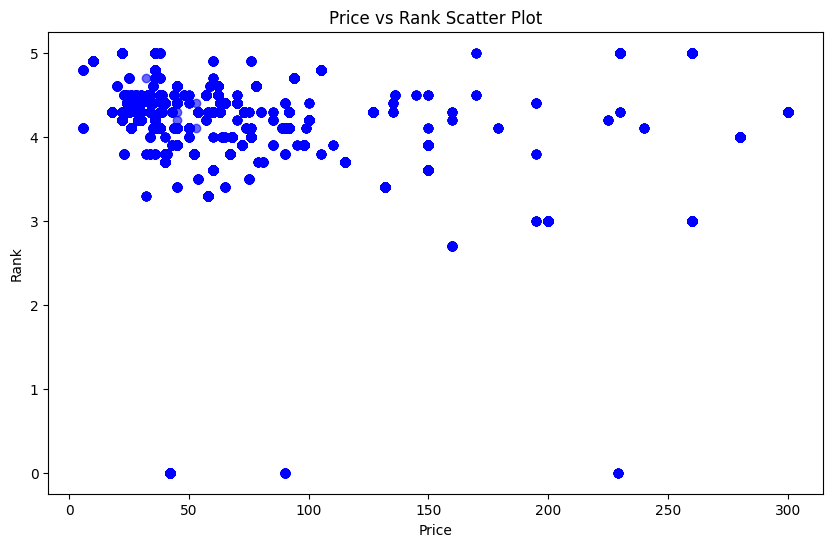

In [ ]:

# We will use basics of matplotlib and have a scatter plot - https://www.w3schools.com/python/matplotlib_scatter.asp
plt.figure(figsize=(10, 6))

x=merged_table['Price']
y=merged_table['Rank']
plt.scatter(x,y, color='blue', alpha=0.6)
plt.title("Price vs Rank Scatter Plot")
plt.xlabel("Price")
plt.ylabel("Rank")

-0.12837509002196287


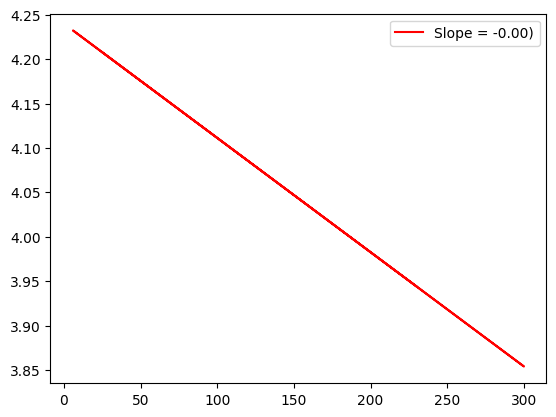

In [ ]:
#We dont seem to have any conclusive proof that higher the price higher the Rating so we will need to find the correlation between the price and rank
#We will use linear regression to find the correlation
correlation = np.corrcoef(x, y)[0, 1] #https://numpy.org/doc/2.0/reference/generated/numpy.corrcoef.html
print(correlation)
# Fit a linear regression line (trend line)
m, b = np.polyfit(x, y, 1) #we have used polyfit as we need to solve the least square method
plt.plot(x, m*x + b, color='red', label=f"Slope = {m:.2f})") #I have set precision as 2
plt.legend()
plt.show()

Conclusion to Hypothesis - The Rank does NOT increase with Price as seen above as the slope is extremely small which indicates almost non existent relationship between the two

# Hypothesis 2: Makeup Products have the highest amount of chemicals in them --> RACHANA DHARMAVARAM (50604169)

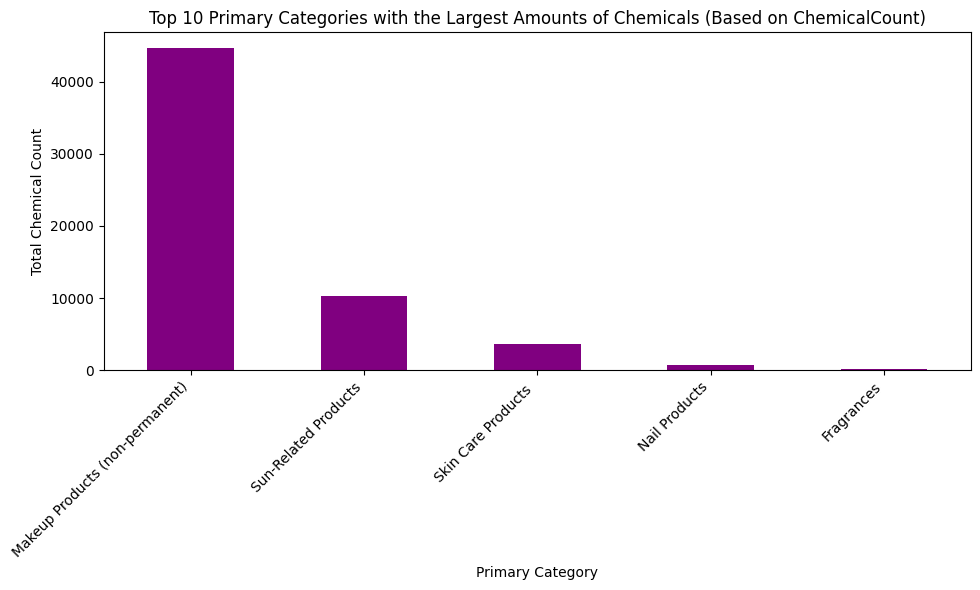

In [ ]:
primary_category_chemicals = merged_table.groupby('PrimaryCategory')['ChemicalCount'].sum().sort_values(ascending=False)
top_10_primary_categories = primary_category_chemicals.head(5)

# We will plot the top 10 Primary Categories with the largest amounts of chemicals
plt.figure(figsize=(10, 6))
top_10_primary_categories.plot(kind='bar', color='purple')
plt.title('Top 10 Primary Categories with the Largest Amounts of Chemicals (Based on ChemicalCount)')
plt.xlabel('Primary Category')
plt.ylabel('Total Chemical Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the above graph it is evidently clear that makeup products as a cosmetic category has the most number of chemicals. We have taken the category and taken summation of the chemicalcount

# Hypothesis 3: Most of the toxic heavy chemicals are still in use  --> ANIRUDH NADIG 50613184

In [ ]:
#For the best reference we will take the original chemicals dataset to see the status of the products with heavy metals

#Let us provide a list of heavy metals

heavy_metals =['arsenic', 'mercury', 'cadmium', 'benzene', 'chromium', 'nickel', 'selenium', 'bha', 'bht', 'butylated hydroxyanisole', 'butylated hydroxytoluene',
               'coal tar', 'dea', 'diethanolamine', 'tea', 'triethanolamine',
               'dbp', 'formaldehyde','dmdm', 'diazolidinyl', 'imidazolidinyl', 'methenamine', 'quaternium-15',
                'paraben', 'musk', 'moskene', 'peg', 'polyethylene', 'propylene glycol',
                'ethoxylates', 'petrolatum', 'mineral oil', 'polycyclic', 'pah', 'siloxane',
                'cyclomethicone', 'sodium laureth', 'sles', 'sls', 'sodium lauryl', 'triclosan']  # have tried to make the list more readable, these are the chemicals i found to be heavy metals

#Now let us take the original dataset before merging (chemicals in cosmetics dataset) --> table_chemicals
heavy_metals2 = [metal.lower() for metal in heavy_metals] #chemicalnames are inconsistent with their naming convention, changing their name to all lower cases
contains_heavy_metals = table_chemicals['ChemicalName'].apply(lambda x: any(metal in str(x).lower() for metal in heavy_metals2))
heavy_metals_in_products = table_chemicals[contains_heavy_metals]


heavy_metals_removed = heavy_metals_in_products[heavy_metals_in_products['ChemicalDateRemoved'].notnull()]
print(f"Total number of products containing heavy metals: {heavy_metals_in_products.shape[0]}")
print(f"Total number of products where heavy metals have been removed: {heavy_metals_removed.shape[0]}")
print("Heavy Metals Found in Products:")
print(heavy_metals_in_products[['ChemicalName', 'ChemicalDateRemoved']].head())
print("\nHeavy Metals Removed from Products:")
print(heavy_metals_removed[['ChemicalName', 'ChemicalDateRemoved']].head())

Total number of products containing heavy metals: 4854
Total number of products where heavy metals have been removed: 529
Heavy Metals Found in Products:
                        ChemicalName ChemicalDateRemoved
1             Distillates (coal tar)                 NaN
31           Cocamide diethanolamine          12/30/2010
49           Cocamide diethanolamine                 NaN
62   Chromium (hexavalent compounds)                 NaN
310         Butylated hydroxyanisole                 NaN

Heavy Metals Removed from Products:
                 ChemicalName ChemicalDateRemoved
31    Cocamide diethanolamine          12/30/2010
497   Cocamide diethanolamine          11/23/2009
498   Cocamide diethanolamine          09/02/2009
499   Cocamide diethanolamine          09/02/2009
501  Lauramide diethanolamine          11/23/2009


It seems in the original cosmetics dataset, most of the heavy metals arent removed! We will look closer into the products themselves now..

In [ ]:
#Note- the dataset is only till 2020 so the chemicals havent been removed as of 2020


products = []
for index, row in table_chemicals.iterrows():
    chemical_name = str(row['ChemicalName']).lower()
    # print(chemical_name)
    for metal in heavy_metals:
        if metal.lower() in chemical_name:
            products.append(row)
            # print(products)
            break
heavy_metals_in_products = pd.DataFrame(products) # we take this datframe to display the required information

product_columns= ['CompanyName', 'BrandName', 'SubCategory', 'PrimaryCategory', 'ChemicalName']
heavy_metals_list= heavy_metals_in_products[product_columns]
print(heavy_metals_list.head())








                        CompanyName    BrandName  \
1               J. Strickland & Co.     Glover's   
31            GOJO Industries, Inc.        GOJO�   
49                      Dermalogica  Dermalogica   
62                      Dermalogica  Dermalogica   
310  Physician's Care Alliance, LLC     PCA Skin   

                                   SubCategory  \
1     Hair Shampoos (making a cosmetic claim)    
31               Hand Cleansers and Sanitizers   
49                       Scrubs and Exfoliants   
62                       Scrubs and Exfoliants   
310  Skin Astringent (making a cosmetic claim)   

                       PrimaryCategory                     ChemicalName  
1    Hair Care Products (non-coloring)           Distillates (coal tar)  
31              Personal Care Products          Cocamide diethanolamine  
49                       Bath Products          Cocamide diethanolamine  
62                       Bath Products  Chromium (hexavalent compounds)  
310             

In [ ]:
#Let us print the company which seems to have the most number of Toxic chemicals
company = heavy_metals_in_products.groupby('CompanyName').size().sort_values(ascending=False) #https://stackoverflow.com/questions/27842613/pandas-groupby-then-sort-within-groups
print(company)
#We also might want to check for the subcategory, where these products are used
category = heavy_metals_in_products.groupby(['CompanyName','SubCategory']).size().sort_values(ascending=False)
print(category)


CompanyName
NYX Los Angeles, Inc.                            1124
Demeter Fragrance Library, Inc.                   238
Greenbrier International, Inc.                    174
MAESA LLC                                         166
American International Industries                 161
                                                 ... 
Perfect Angel Cosmetics & Health CO., Limited       1
Pearlosophy USA, LLC                                1
Bonne Bell, LLC                                     1
Tupperware U.S., Inc.                               1
Natural Solter S.L.                                 1
Length: 243, dtype: int64
CompanyName                             SubCategory                                
NYX Los Angeles, Inc.                   Lip Color - Lipsticks, Liners, and Pencils     594
                                        Eye Shadow                                     268
Demeter Fragrance Library, Inc.         Body Washes and Soaps                          238
NYX Los Ang

Lipsticks are the category with the most number of heavy metals

Now let us make sure for our skin care recommendation system we can limit the number of heavy metals from the original dataset (We dont want to recommend the toxic chemicals) , let us check this

In [ ]:
#We will use a similar method as done for the original dataset for the merged_dataset which is labelled as merged_table

merged_products =[]

for index, row in merged_table.iterrows():
    chemical_name = str(row['ChemicalName']).lower()
    for metal in heavy_metals:
        if metal.lower() in chemical_name:
            merged_products.append(row)
            break

heavy_metals_in_products_merged = pd.DataFrame(merged_products)
total_products_with_heavy_metals = heavy_metals_in_products_merged.shape[0]
print(f"Total number of heavy metal containing products in our merged dataset : {total_products_with_heavy_metals}")
product_columns= ['CompanyName', 'BrandName', 'SubCategory', 'PrimaryCategory', 'ChemicalName']
heavy_metals_list_merged_table= heavy_metals_in_products_merged[product_columns]
print(heavy_metals_list_merged_table)

Total number of heavy metal containing products in our merged dataset : 508
                  CompanyName         BrandName               SubCategory  \
0      Shiseido America, Inc.              NARS                  Blushes    
1      Shiseido America, Inc.              NARS                  Blushes    
2      Shiseido America, Inc.              NARS                  Blushes    
3      Shiseido America, Inc.              NARS                  Blushes    
530            Nars Cosmetics              NARS                  Blushes    
...                       ...               ...                       ...   
49461        MAKE UP FOR EVER  MAKE UP FOR EVER  Mascara/Eyelash Products   
49462        MAKE UP FOR EVER  MAKE UP FOR EVER  Mascara/Eyelash Products   
49463        MAKE UP FOR EVER  MAKE UP FOR EVER  Mascara/Eyelash Products   
52342        MAKE UP FOR EVER  MAKE UP FOR EVER  Mascara/Eyelash Products   
52343        MAKE UP FOR EVER  MAKE UP FOR EVER  Mascara/Eyelash Products   


As we can see we have severly limited the amount of products with toxic metals. Now let us see what all chemicals we still have left which have toxins

BrandName
NARS                456
GUERLAIN             36
MAKE UP FOR EVER     16
dtype: int64


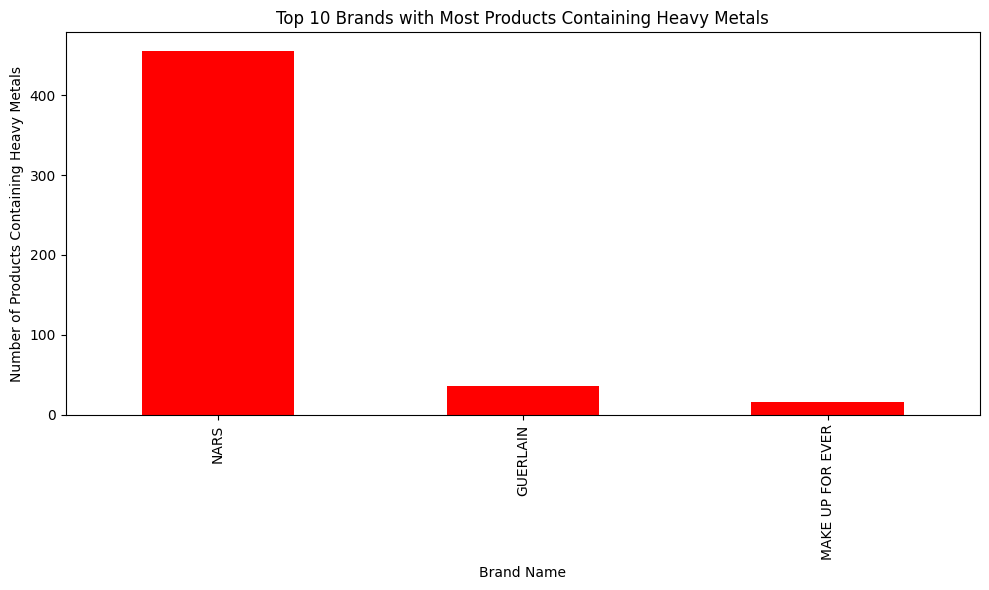

In [ ]:
#let us take the count of heavy metals

heavy_metal_counts = {}
for metal in heavy_metals:
    count = heavy_metals_in_products_merged['ChemicalName'].str.lower().str.contains(metal.lower()).sum()
    heavy_metal_counts[metal] = count

# print(f"heavy metals count : {heavy_metal_counts}")
counts_df = pd.DataFrame(list(heavy_metal_counts.items()), columns=['Heavy Metal', 'Count'])
heavy_metals_merged_brand_count =heavy_metals_in_products_merged.groupby('BrandName').size().sort_values(ascending=False)
print(heavy_metals_merged_brand_count)

#It seems only three brands have some sort of toxic metals in our datasets!

#heavy metal count with brands
plt.figure(figsize=(10, 6))
heavy_metals_merged_brand_count.head(3).plot(kind='bar', color='red')
plt.title('Top 10 Brands with Most Products Containing Heavy Metals')
plt.xlabel('Brand Name')
plt.ylabel('Number of Products Containing Heavy Metals')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#let us see which sub category these products from these three brands lie in

sub_category_merged = heavy_metals_in_products_merged.groupby('SubCategory').size().sort_values(ascending=False)
print(sub_category_merged)


SubCategory
Eye Shadow                  268
Blushes                     180
Mascara/Eyelash Products     50
Face Powders                  8
Foundations and Bases         2
dtype: int64


# **Hypothesis 4: Most of the chemicals used for our Merged Dataset have very minimal Chemical Side affects**-- Satya Vaishnavi Jami (50592365)

In [ ]:
#let us first get the total number of chemicals by percentage of unique values

# we will take number of occurences of unique chemical/ total number of chemical occurences * 100

chemical_counts = merged_table['ChemicalName'].value_counts()
total_chemical_count = chemical_counts.sum()
print(f"total_chemical_count - {total_chemical_count}")
percentage = chemical_counts / total_chemical_count * 100
print(percentage)



total_chemical_count - 53763
ChemicalName
Titanium dioxide                                                94.27
Mica                                                             3.43
Carbon black                                                     1.16
Butylated hydroxyanisole                                         0.85
Triethanolamine                                                  0.09
Retinyl palmitate                                                0.06
Caffeine                                                         0.04
Cocamide MEA                                                     0.02
Benzophenone-4                                                   0.02
Carbon black (airborne, unbound particles of respirable size)    0.02
Aloe vera, whole leaf extract                                    0.01
Benzophenone-3                                                   0.01
Name: count, dtype: float64


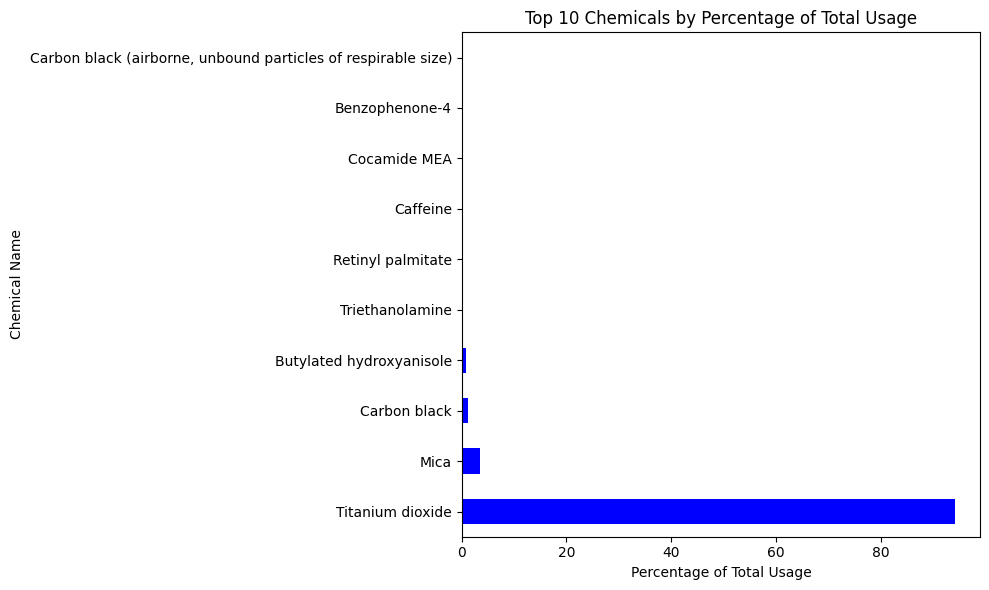

In [ ]:
#Let us now plot the graph for the above for a clearer picture

plt.figure(figsize=(10, 6))
percentage.head(10).plot(kind='barh', color='blue') #we will take top 10
plt.title('Top 10 Chemicals by Percentage of Total Usage')
plt.xlabel('Percentage of Total Usage')
plt.ylabel('Chemical Name')
plt.tight_layout()
plt.show()

A huge majority of chemicals for our dataset has Titanium Dioxide whose toxicity is almost null. Now let us see where Titanium Dioxide is used in terms of category

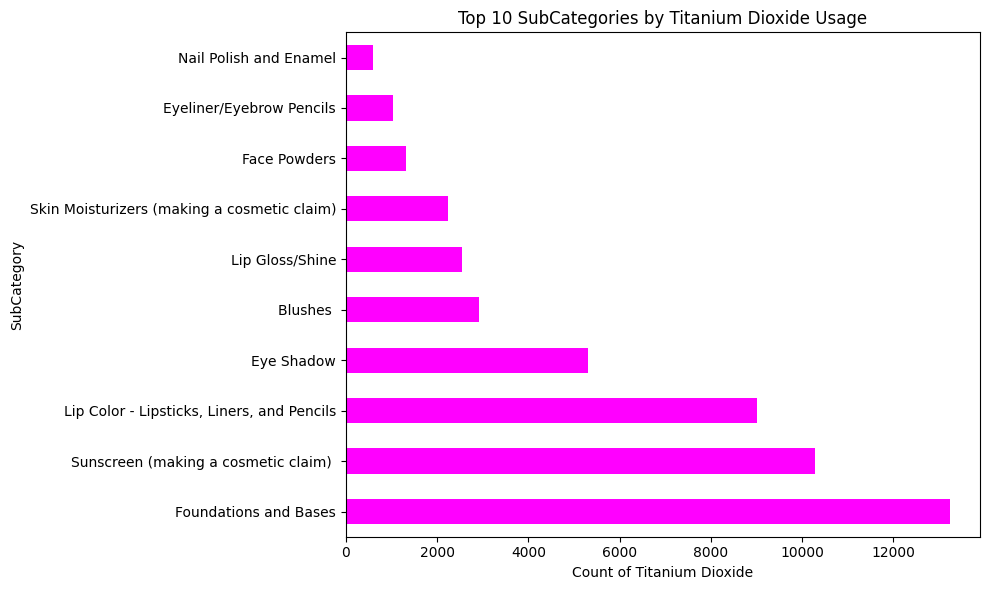

In [ ]:
#Which sub category of products is Titanium Dioxide used for primarily

titanium = merged_table[merged_table['ChemicalName'].str.contains('Titanium dioxide', case=False, na=False)]
titanium_sub = titanium.groupby('SubCategory').size().sort_values(ascending=False)
titanium_sub.head(10)

#now let us see the table for this with the top 10 values
top_10 = titanium_sub.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color='magenta')
plt.title('Top 10 SubCategories by Titanium Dioxide Usage')
plt.xlabel('Count of Titanium Dioxide')
plt.ylabel('SubCategory')
plt.tight_layout()
plt.show()


# Hypothesis 5 \: Color adding chemicals in products are mainly used for makeup products Satya Vaishnavi Jami (50592365)

<ipython-input-21-e8f4c199934c>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  color_chemicals_filtered= merged_table[merged_table['ChemicalName'].str.contains('|'.join(color_chemicals), case=False, na=False)] #we use the OR operand here as we need any of the target chemicals in the ChemicalName


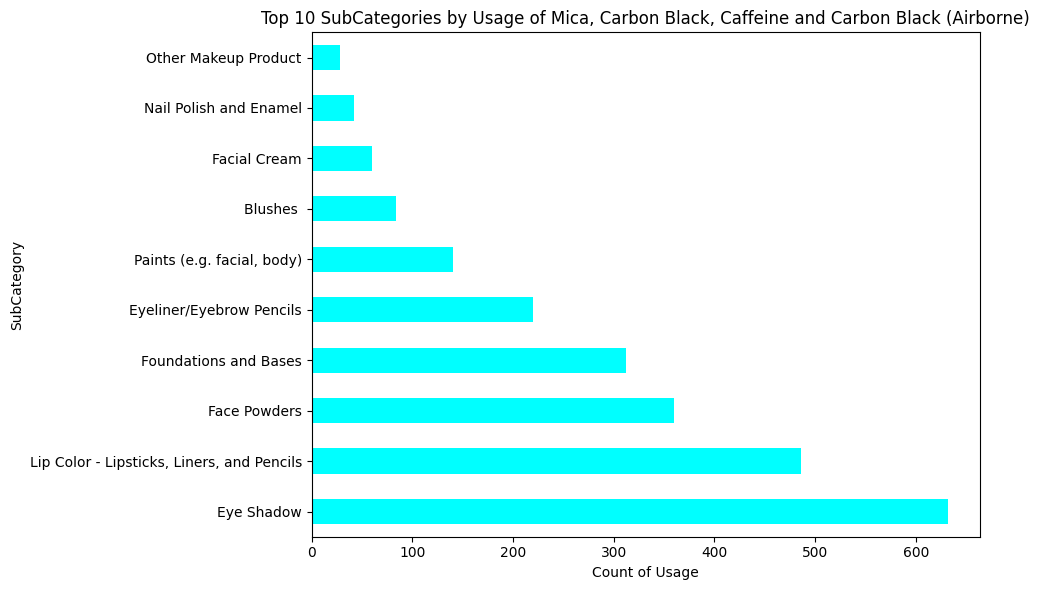

In [ ]:
#let us first sort by the ChemicalName =Mica, Carbon Black, Carbon black (airborne, unbound particles of respirable size), Caffeine

color_chemicals =['Mica', 'Carbon Black', 'Carbon black (airborne, unbound particles of respirable size)', 'Caffeine']
color_chemicals_filtered= merged_table[merged_table['ChemicalName'].str.contains('|'.join(color_chemicals), case=False, na=False)] #we use the OR operand here as we need any of the target chemicals in the ChemicalName
# color_chemicals_filtered.head(5)
subcategory_color= color_chemicals_filtered.groupby('SubCategory').size().sort_values(ascending=False)
subcategory_color.head(10)

#We will now plot this to give a visualization
plt.figure(figsize=(10, 6))
top_10_color_categories = subcategory_color.head(10)
top_10_color_categories.plot(kind='barh', color='cyan')
plt.title('Top 10 SubCategories by Usage of Mica, Carbon Black, Caffeine and Carbon Black (Airborne)')
plt.xlabel('Count of Usage')
plt.ylabel('SubCategory')
plt.tight_layout()
plt.show()



# Hypothesis 6 \: Skin Type Analysis RACHANA DHARMAVARAM (50604169)

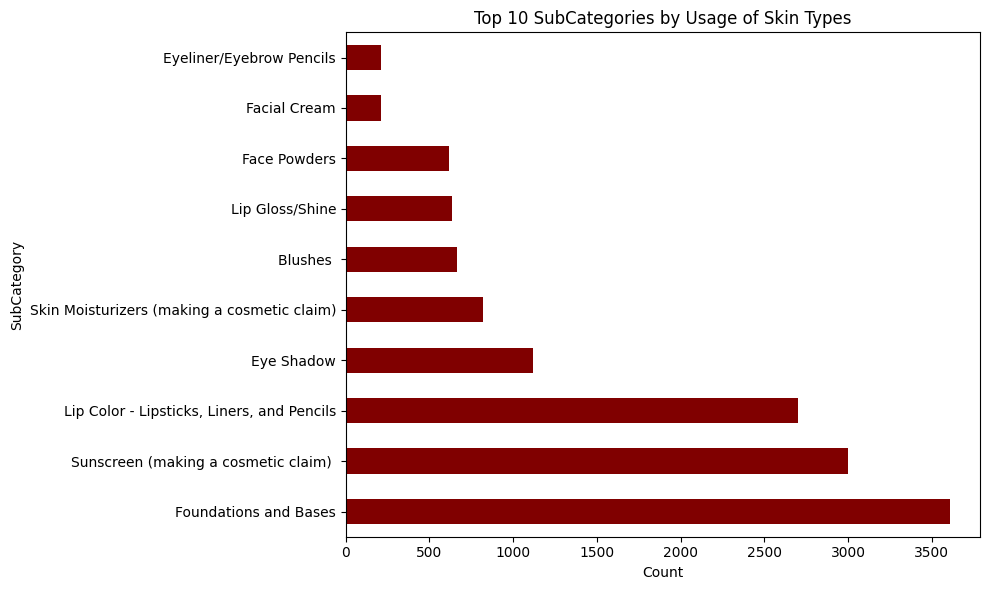

In [ ]:
#Let us take all records where skin types =1 , we will ignore combination kin type for now as we need the oily, dry and sensitive data

skin_type = merged_table[ (merged_table['Dry'] == 1) & (merged_table['Normal'] == 1) & (merged_table['Oily'] == 1) & (merged_table['Sensitive'] == 1)]
#let  us group by the skin type
skin_type_sub = skin_type.groupby('SubCategory').size().sort_values(ascending=False) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
skin_type_sub.head(10)

#Foundations and bases follwed by sunscreen are for almost all skin types

plt.figure(figsize=(10, 6))
skin_type_sub.head(10).plot(kind='barh', color='maroon')
plt.title('Top 10 SubCategories by Usage of Skin Types')
plt.xlabel('Count')
plt.ylabel('SubCategory')
plt.tight_layout()


Now for a person who has sensitive skin let us categorize the products and see which brand has the most number of products available to them

For sensitive people let us see which sub categories of products are most available for which chemical

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

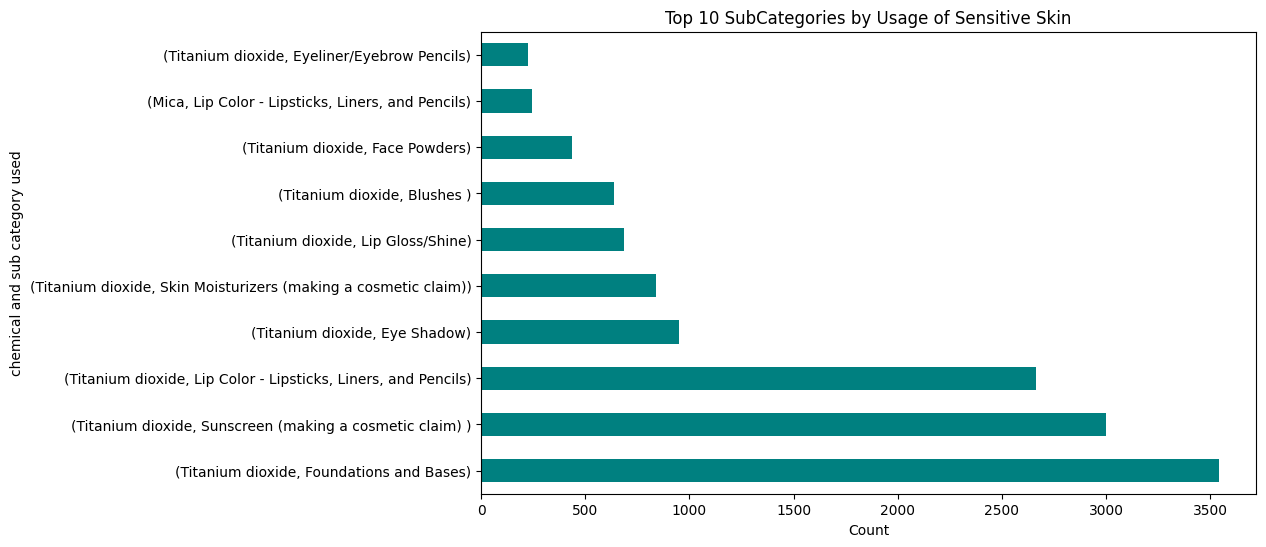

In [ ]:
sensitive_skin = merged_table[merged_table['Sensitive'] == 1]
sensitive_skin_count = sensitive_skin.groupby(['ChemicalName', 'SubCategory']).size().sort_values(ascending=False) #with this we can display two values on the y axis Chemical/Sub category with Sensitive=1 vs count
sensitive_skin_count.head(10)
plt.figure(figsize=(10, 6))
sensitive_skin_count.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 SubCategories by Usage of Sensitive Skin')
plt.xlabel('Count')
plt.ylabel('chemical and sub category used')
plt.tight_layout

Now let us see for sensitive skin types which brands offer the most number of products

The brands offering the most number of products for sensitive skin types are : BrandName
SHISEIDO        8640
GUERLAIN        3387
LANEIGE         1120
CLARINS          636
EVE LOM          354
SK-II            270
ERBORIAN         188
AMOREPACIFIC     180
dtype: int64


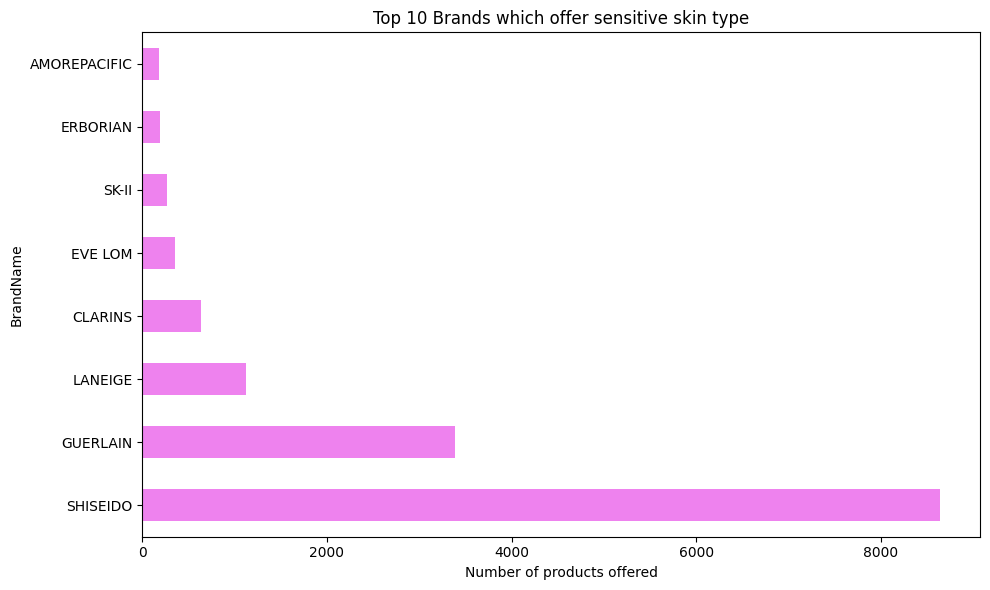

In [ ]:
#We will begin by first sorting brandname
sensitive_skin_brandname = sensitive_skin.groupby('BrandName').size().sort_values(ascending=False)
# sensitive_skin_brandname

print(f"The brands offering the most number of products for sensitive skin types are : {sensitive_skin_brandname.head(10)}")
#there are 8 main brands offering products for skin type = sensitive

plt.figure(figsize=(10, 6))
sensitive_skin_brandname.head(10).plot(kind='barh', color='violet')
plt.title('Top 10 Brands which offer sensitive skin type')
plt.xlabel('Number of products offered')
plt.ylabel('BrandName')
plt.tight_layout()
plt.show()
